In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score
from sklearn.preprocessing import StandardScaler

In [138]:
df = pd.read_csv("BKB_WaterQualityData_2020084.csv.xlxs.csv")
df.head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,01csv,01/03/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00:00 AM,Not Recorded,10/30/2019,Christine Folks,8.0,1994
1,Bay,01csv,01/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30:00 AM,Not Recorded,10/30/2019,Christine Folks,2.6,1994
2,Bay,01csv,02/07/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,09:45:00 AM,Not Recorded,10/30/2019,Christine Folks,7.6,1994
3,Bay,01csv,02/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,12:00:00 AM,Not Recorded,10/30/2019,Christine Folks,2.7,1994
4,Bay,01csv,02/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30:00 AM,Not Recorded,10/30/2019,Christine Folks,0.0,1994


In [140]:
# Select relevant columns
df_model = df[[
    'pH (standard units)',
    'Dissolved Oxygen (mg/L)',
    'Salinity (ppt)',
    'Water Temp (?C)',
    'Water Depth (m)',
    'Secchi Depth (m)',
    'Air Temp-Celsius',
    'Year'
]]

# Remove missing values
df_model = df_model.dropna()

df_model.describe()

,pH (standard units),Dissolved Oxygen (mg/L),Salinity (ppt),Water Temp (?C),Water Depth (m),Secchi Depth (m),Air Temp-Celsius,Year
count,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000
mean,7.168212,6.646263,0.717068,18.062138,0.762559,0.524898,16.437647,2006.049346
std,0.772521,2.006740,1.196586,8.083638,0.611766,0.466312,2.212872,9.002373
min,0.300000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,1899.000000
25%,6.500000,5.850000,0.000000,12.000000,0.400000,0.300000,16.437647,2001.000000
50%,7.000000,6.646263,0.000000,18.062138,0.700000,0.400000,16.437647,2007.000000
75%,7.500000,7.300000,1.000000,25.000000,0.927500,0.600000,16.437647,2012.000000
max,9.900000,15.100000,9.000000,74.000000,12.000000,9.000000,74.000000,2019.000000


In [142]:
#for random forest regression
rf_df = df[
    ["pH (standard units)",
     "Dissolved Oxygen (mg/L)",
     "Water Temp (?C)",
     "Water Depth (m)",
     "Secchi Depth (m)",
     "Year",
     "Salinity (ppt)"]
].dropna() 

In [144]:
#for random forest regression
X_rf = rf_df[
    ["pH (standard units)",
     "Dissolved Oxygen (mg/L)",
     "Water Temp (?C)",
     "Water Depth (m)",
     "Secchi Depth (m)",
     "Year"]
]

y_rf = rf_df["Salinity (ppt)"]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest R²:", rf_r2)
print("Random Forest RMSE:", rf_rmse)

Random Forest R²: 0.7073517518810054
Random Forest RMSE: 0.6394529311544088


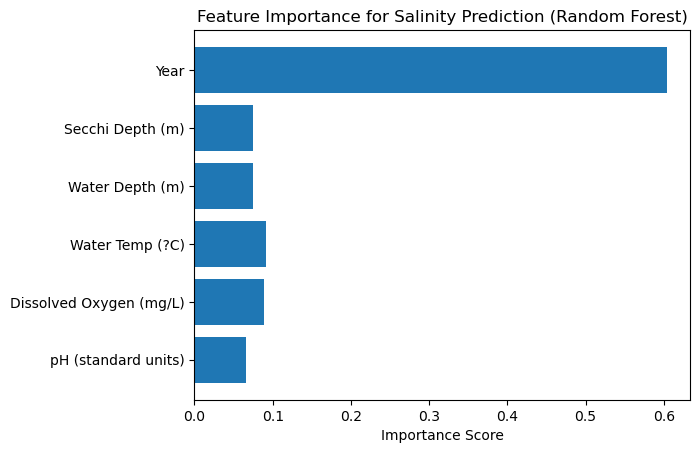

In [148]:
#feature importance
plt.figure()
plt.barh(X_rf.columns, rf.feature_importances_)
plt.xlabel("Importance Score")
plt.title("Feature Importance for Salinity Prediction (Random Forest)")
plt.show()

In [153]:
#linear regression
lr_df = df[
    ["pH (standard units)", "Dissolved Oxygen (mg/L)"]
].dropna()

In [155]:
X_lr = lr_df[["pH (standard units)"]]
y_lr = lr_df["Dissolved Oxygen (mg/L)"]

In [157]:
model_lr = LinearRegression()
model_lr.fit(X_lr, y_lr)

y_pred_lr = model_lr.predict(X_lr)
lr_r2 = r2_score(y_lr, y_pred_lr)

print("Linear Regression R²:", lr_r2)
print("Slope:", model_lr.coef_[0])
print("Intercept:", model_lr.intercept_)

Linear Regression R²: 0.0020908130455672413
Slope: 0.11877871033970266
Intercept: 5.794832207813148


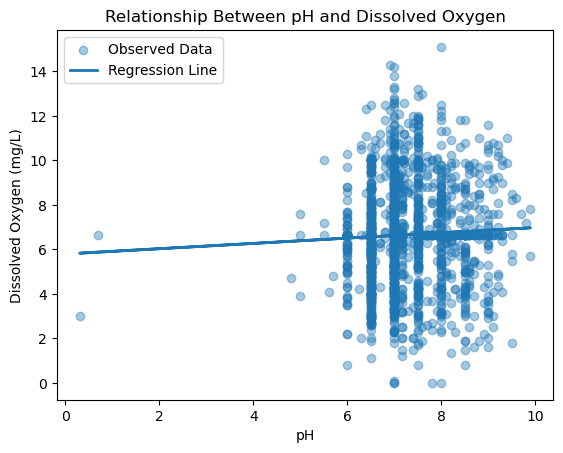

In [159]:
# Plot Linear Regression
plt.figure()
plt.scatter(X_lr, y_lr, alpha=0.4, label="Observed Data")
plt.plot(X_lr, y_pred_lr, linewidth=2, label="Regression Line")
plt.xlabel("pH")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.title("Relationship Between pH and Dissolved Oxygen")
plt.legend()
plt.show()

In [161]:
# select clustering features
cluster_data = df_model[[
    'pH (standard units)',
    'Dissolved Oxygen (mg/L)',
    'Salinity (ppt)',
    'Water Temp (?C)'
]]

In [163]:
#standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

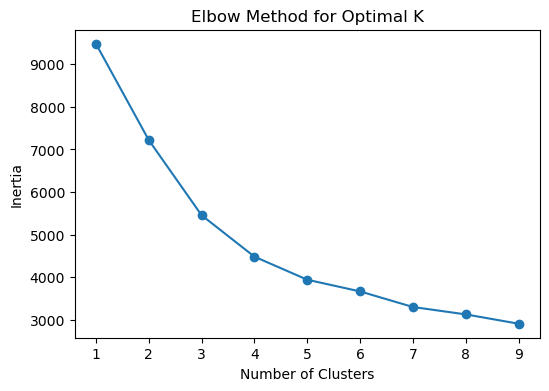

In [165]:
#elbow method
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,10), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [167]:
#applying k-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
df_model['Cluster'] = kmeans.fit_predict(scaled_data)

In [169]:
# Silhouette Score
sil_score = silhouette_score(scaled_data, df_model['Cluster'])
print("K-Means Silhouette Score:", sil_score)

K-Means Silhouette Score: 0.27533233943225927


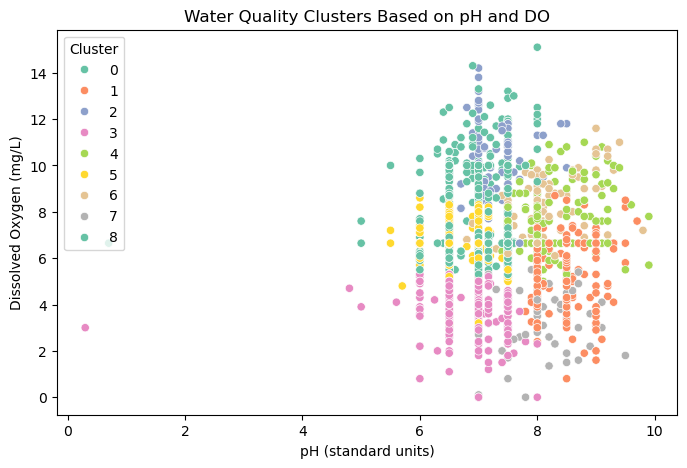

In [171]:
#Visualizating clustered Water Quality 
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='pH (standard units)',
    y='Dissolved Oxygen (mg/L)',
    hue='Cluster',
    data=df_model,
    palette='Set2'
)
plt.title("Water Quality Clusters Based on pH and DO")
plt.show()

               Model     Score
0  Linear Regression  0.002091
1      Random Forest  0.707352
2            K-Means  0.275332


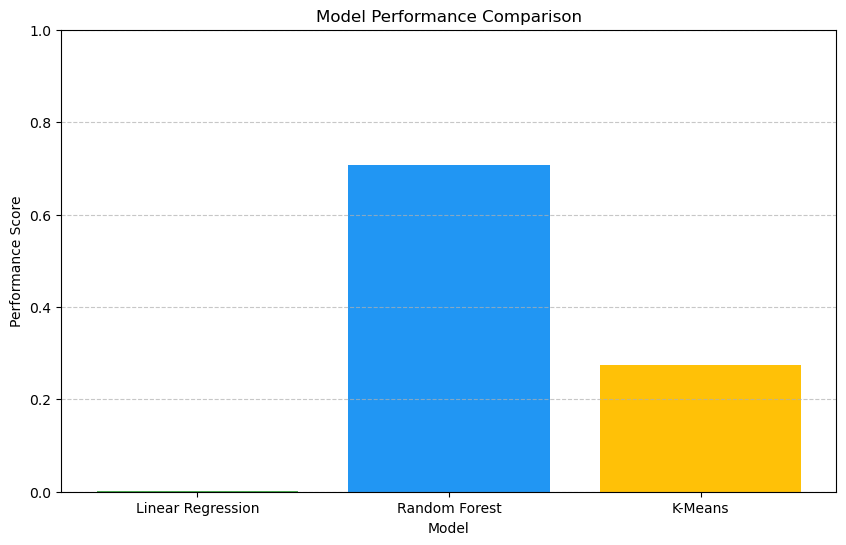

In [187]:
comparison_data = {
    "Model": ["Linear Regression", "Random Forest", "K-Means"],
    "Score": [lr_r2, rf_r2, sil_score]
}
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

plt.figure(figsize=(10, 6))
plt.bar(
    comparison_df["Model"],
    comparison_df["Score"],
    color=["#4CAF50", "#2196F3", "#FFC107"]
)
plt.title("Model Performance Comparison")
plt.ylabel("Performance Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [183]:
# ===========================
# TERMINAL MENU SYSTEM
# ===========================

def menu():
    print("\n===================================")
    print("  WATER QUALITY PREDICTION SYSTEM")
    print("===================================")
    print("1. Predict Dissolved Oxygen (Linear Regression)")
    print("2. Predict Salinity (Random Forest)")
    print("3. Identify Water Quality Cluster (K-Means)")
    print("4. Exit")


while True:
    menu()
    choice = input("\nSelect an option (1-4): ").strip()

    # ---------------------------------
    # OPTION 1: Dissolved Oxygen
    # ---------------------------------
    if choice == "1":
        print("\n--- Dissolved Oxygen Prediction ---")
        ph = float(input("Enter water pH value: "))

        input_df = pd.DataFrame(
            [[ph]],
            columns=["pH (standard units)"]
        )

        do_pred = model_lr.predict(input_df)

        print(f"\nEstimated Dissolved Oxygen: {do_pred[0]:.2f} mg/L")
        print("Interpretation: Higher DO indicates healthier water.")

    # ---------------------------------
    # OPTION 2: Salinity Prediction
    # ---------------------------------
    elif choice == "2":
        print("\n--- Salinity Prediction ---")

        ph = float(input("Enter pH value: "))
        do = float(input("Enter Dissolved Oxygen (mg/L): "))
        temp = float(input("Enter Water Temperature (°C): "))
        depth = float(input("Enter Water Depth (m): "))
        secchi = float(input("Enter Secchi Depth (m): "))
        year = int(input("Enter Year: "))

        input_df = pd.DataFrame(
            [[ph, do, temp, depth, secchi, year]],
            columns=[
                "pH (standard units)",
                "Dissolved Oxygen (mg/L)",
                "Water Temp (?C)",
                "Water Depth (m)",
                "Secchi Depth (m)",
                "Year"
            ]
        )

        sal_pred = rf.predict(input_df)

        print(f"\nPredicted Salinity: {sal_pred[0]:.2f} ppt")
        print("Interpretation: Salinity affects aquatic species distribution.")

    # ---------------------------------
    # OPTION 3: Water Quality Clustering
    # ---------------------------------
    elif choice == "3":
        print("\n--- Water Quality Cluster Identification ---")

        ph = float(input("Enter pH value: "))
        do = float(input("Enter Dissolved Oxygen (mg/L): "))
        sal = float(input("Enter Salinity (ppt): "))
        temp = float(input("Enter Water Temperature (°C): "))

        input_df = pd.DataFrame(
            [[ph, do, sal, temp]],
            columns=[
                "pH (standard units)",
                "Dissolved Oxygen (mg/L)",
                "Salinity (ppt)",
                "Water Temp (?C)"
            ]
        )

        scaled_input = scaler.transform(input_df)
        cluster = kmeans.predict(scaled_input)

        print(f"\nWater Sample belongs to Cluster: {cluster[0]}")
        print("Interpretation: Samples in the same cluster have similar water quality.")

    # ---------------------------------
    # EXIT
    # ---------------------------------
    elif choice == "4":
        print("\nSystem closed successfully.")
        print("Thank you for using the Water Quality Predictor.")
        break

    else:
        print("\nInvalid option. Please choose between 1 and 4.")



  WATER QUALITY PREDICTION SYSTEM
1. Predict Dissolved Oxygen (Linear Regression)
2. Predict Salinity (Random Forest)
3. Identify Water Quality Cluster (K-Means)
4. Exit



Select an option (1-4):  1



--- Dissolved Oxygen Prediction ---


Enter water pH value:  10



Estimated Dissolved Oxygen: 6.98 mg/L
Interpretation: Higher DO indicates healthier water.

  WATER QUALITY PREDICTION SYSTEM
1. Predict Dissolved Oxygen (Linear Regression)
2. Predict Salinity (Random Forest)
3. Identify Water Quality Cluster (K-Means)
4. Exit



Select an option (1-4):  2



--- Salinity Prediction ---


Enter pH value:  9
Enter Dissolved Oxygen (mg/L):  10
Enter Water Temperature (°C):  10
Enter Water Depth (m):  100
Enter Secchi Depth (m):  50
Enter Year:  1993



Predicted Salinity: 2.47 ppt
Interpretation: Salinity affects aquatic species distribution.

  WATER QUALITY PREDICTION SYSTEM
1. Predict Dissolved Oxygen (Linear Regression)
2. Predict Salinity (Random Forest)
3. Identify Water Quality Cluster (K-Means)
4. Exit



Select an option (1-4):  3



--- Water Quality Cluster Identification ---


Enter pH value:  10
Enter Dissolved Oxygen (mg/L):  9
Enter Salinity (ppt):  2.47
Enter Water Temperature (°C):  90



Water Sample belongs to Cluster: 1
Interpretation: Samples in the same cluster have similar water quality.

  WATER QUALITY PREDICTION SYSTEM
1. Predict Dissolved Oxygen (Linear Regression)
2. Predict Salinity (Random Forest)
3. Identify Water Quality Cluster (K-Means)
4. Exit



Select an option (1-4):  4



System closed successfully.
Thank you for using the Water Quality Predictor.
